## Project Name: House Price Prediction: Advanced Regression Techniques

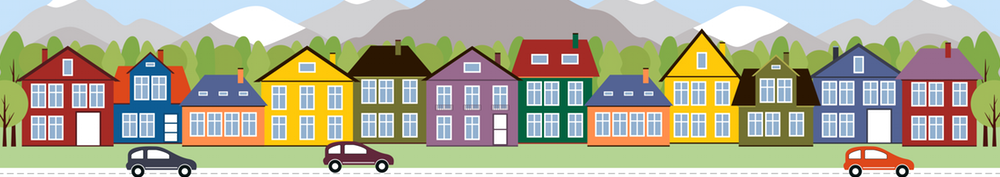

### Objectif : 
The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# set the global default size of matplotlib figures
plt.rc('figure', figsize=(8, 6))

# display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

# display all the rows 
pd.pandas.set_option('display.max_rows',None)

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Data Analysis Phase

Main aim is to understand more about the data, to apply data preprocessing and preparation techniques in order to obtain clean data.

### Checklist

* **Target Variable:** Sale price between 34900 and 755000.

* **Rows & columns:** 1460 rows, 81 columns

* **Type of variables:** quantitative: 38, qualitative: 43

* **Missing values:** 

    - **PoolQC, MiscFeature, Alley, Fence** with more than 80% of missing values.
    - **FireplaceQu** 47%
    - **LotFrontage** 18%
    - **GarageType, GarageCond, GarageFinish, GarageQual, GarageYrBlt** with about 6% missing values
    - **BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1** about 3% missing values
    - **MasVnrArea, MasVnrType** about 1% missing values
    - **Electrical** about 0.1%

Here we have a csv file containing the data tha will be used for training our model, so as a first step we have to understand and analyse our data to get the cleaned data ready for fitting the model.

In [2]:
# import th csv file
df = pd.read_csv('house.csv')

In [3]:
display(df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# display the shape of dataset with rows and columns
print(df.shape)

(1460, 81)


In [5]:
# data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

Let's get info regarding our data through info() function.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

From these informations we could see that some features won't be relevent in our analysis as there are many missing values such as `Alley`, `PoolQC`, and `MiscFeature`. In addition there is so much features to analyse so it may be better to concentrate on the ones which can give us real insights and can help in forecasting sale prices. First of all let's remove the Id column.

In [8]:
# drop irrelevent columns 
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

#### Missing values

Here we should deal with the problem of missing values because some machine learning models don't accept data with missing values. So, let's see the number and the percentage of missing values for each column in our dataset.

In [9]:
total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum()>=1]
percent = np.round(df.isnull().mean()[df.isnull().sum()>=1]*100, 2)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageCond,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


We can see that approximetely 5% from the houses are without garages for that we are going to fill missing values related to garages such as GarageType, GarageYrBlt, GarageFinish , GarageQual and GarageCond in a properly way.

We are going to replace the remain NaN values in categorical variables with new category 'No'.

In [10]:
df['GarageType'] = df['GarageType'].fillna('No')

<AxesSubplot:xlabel='GarageType', ylabel='count'>

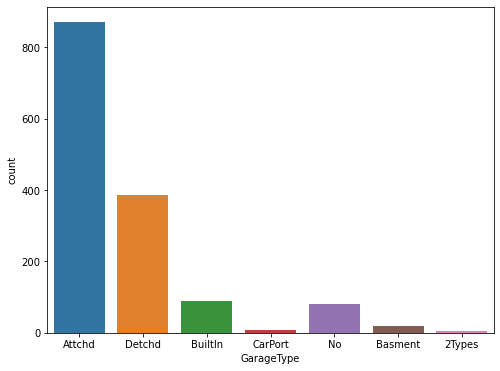

In [11]:
# plot garages' types
sns.countplot(x='GarageType', data=df)

In [12]:
df['GarageFinish'] = df['GarageFinish'].fillna('No')
df['GarageQual'] = df['GarageQual'].fillna('No')
df['GarageCond'] = df['GarageCond'].fillna('No')

<AxesSubplot:xlabel='GarageQual', ylabel='count'>

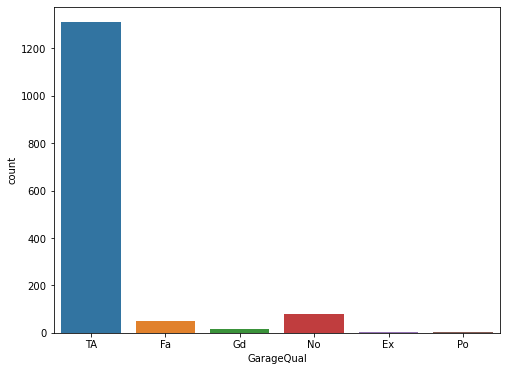

In [13]:
# plot garages' qualities
sns.countplot(x='GarageQual', data=df)

In [14]:
# replace NaN GarageYrBlt with 0
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0) 

In [15]:
# replace the rest of null categorical features with the new category 'Missing'
df['FireplaceQu'] = df['FireplaceQu'].fillna('No')
df['MasVnrType'] = df['MasVnrType'].fillna('No')
df['BsmtQual'] = df['BsmtQual'].fillna('No')
df['BsmtCond'] = df['BsmtCond'].fillna('No')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No')
df['Electrical'] = df['Electrical'].fillna('No')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No')

df['Alley'] = df['Alley'].fillna('No')
df['PoolQC'] = df['PoolQC'].fillna('No')
df['Fence'] = df['Fence'].fillna('No')
df['MiscFeature'] = df['MiscFeature'].fillna('No')

#### Check duplicate entries

In [16]:
len(df[df.duplicated()])

0

There are no duplicates rows in our dataset.

#### Target variable : the sale price

Let's get an idea about the sale price. 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


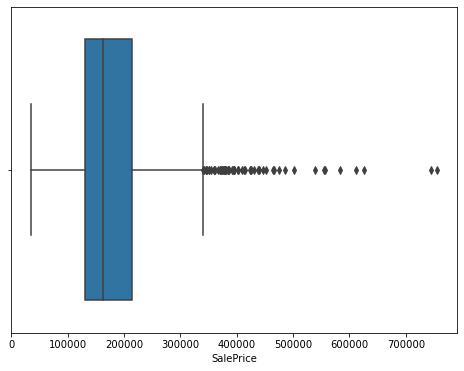

In [17]:
print(df['SalePrice'].describe())
sns.boxplot(df.SalePrice)
plt.show()

The boxplot shows that there are many outliers in the sale prices lies above ~350,000.

Let's take a look at how the sale price is distributed.

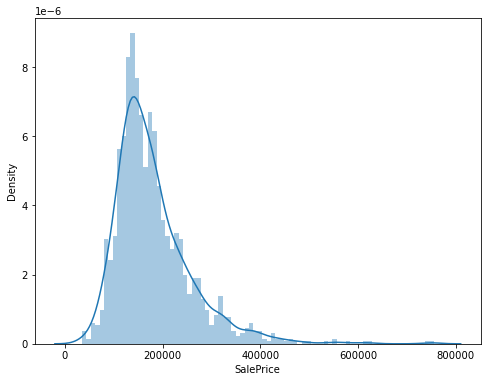

In [18]:
sns.distplot(df['SalePrice'], bins=80, hist_kws={'alpha': 0.4})
plt.show()

So here from the histogram we could see that the house prices are right skewed.

#### Relation between Target / Numerical features

In [19]:
# list of numerical variables
num_features = df.drop('SalePrice',axis=1).select_dtypes(np.number).columns
print('Number of numerical variables: ', len(num_features))
print('\n')
num_features

Number of numerical variables:  36




Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

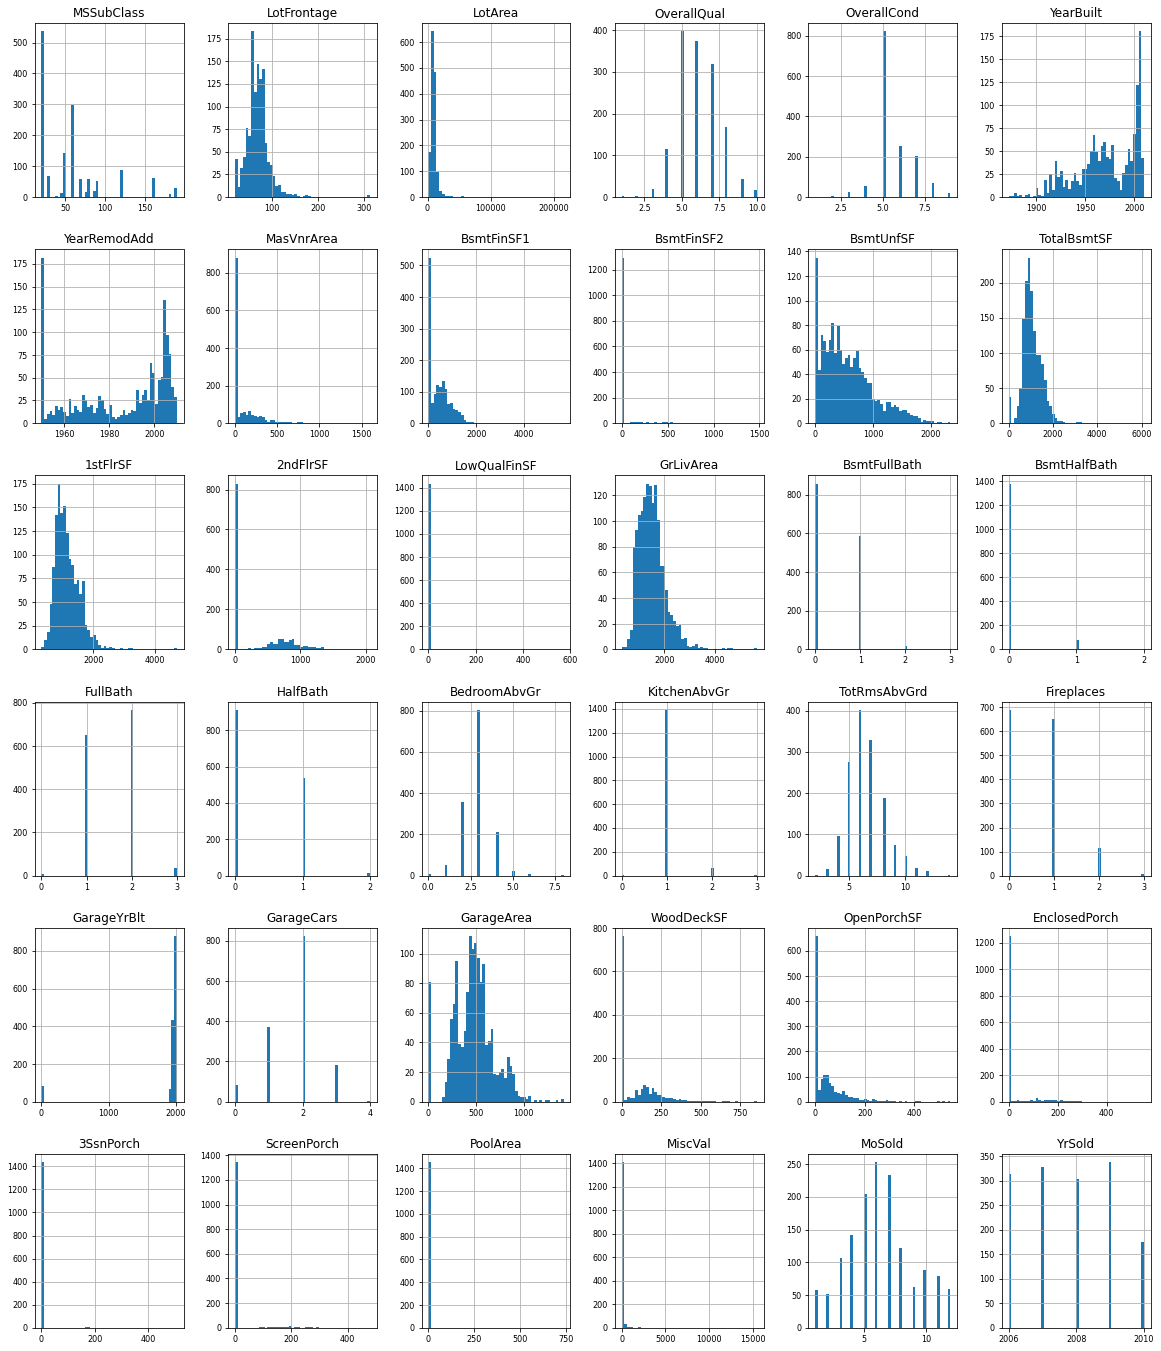

In [20]:
# plot the distribution of all of the numerical features.
df[num_features].hist(figsize=(20,24), bins=50, xlabelsize=8, ylabelsize=8);

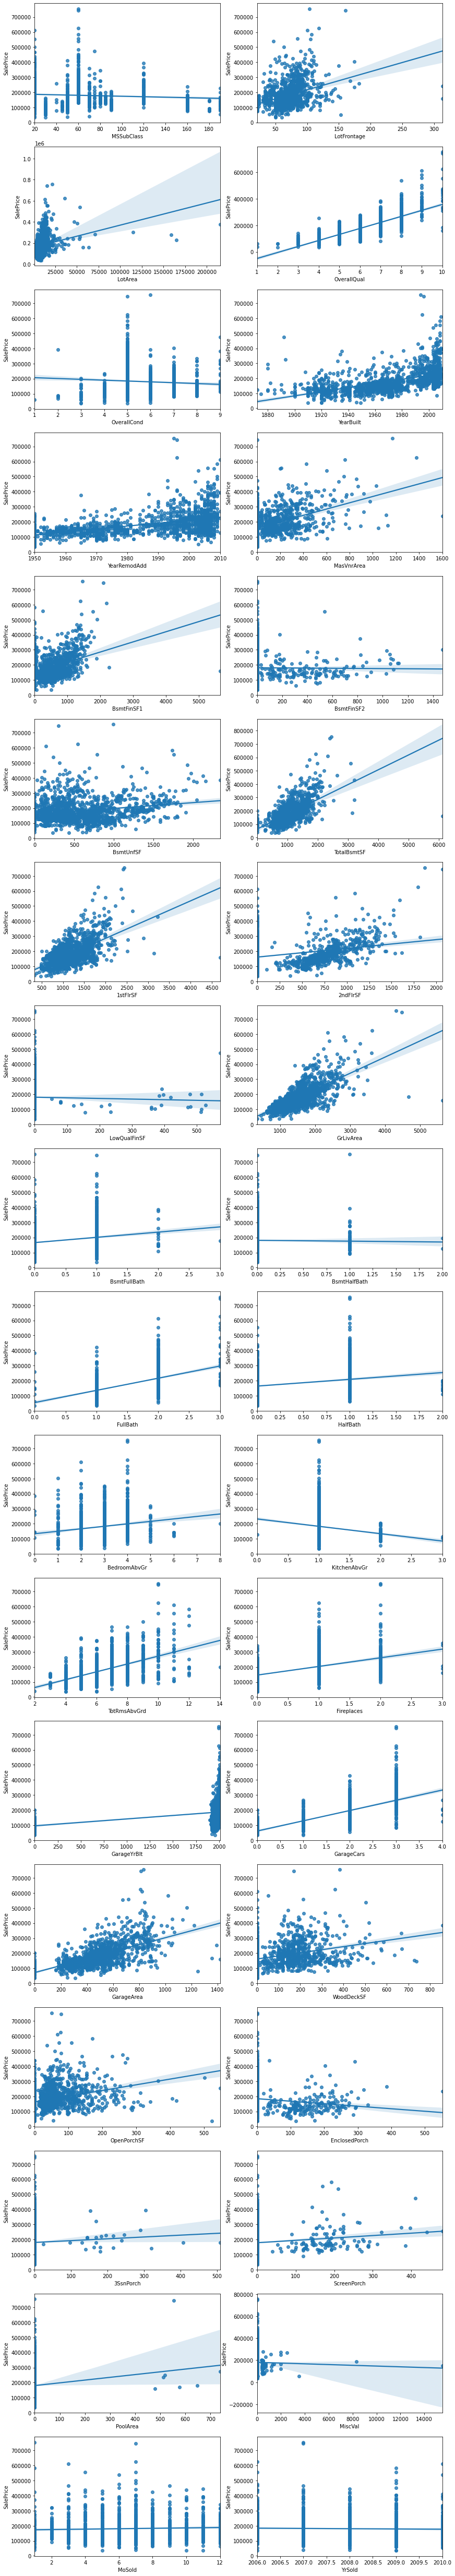

In [21]:
# plot the relationship between the target variable and all the numerical features using scatter plot.
fig, ax = plt.subplots(round(len(num_features) / 2), 2, figsize = (14, 90))

for i, ax in enumerate(fig.axes):
    if i <= len(num_features):
        sns.regplot(x=num_features[i],y=df.SalePrice, data=df[num_features], ax=ax)

#### Multicollinearity

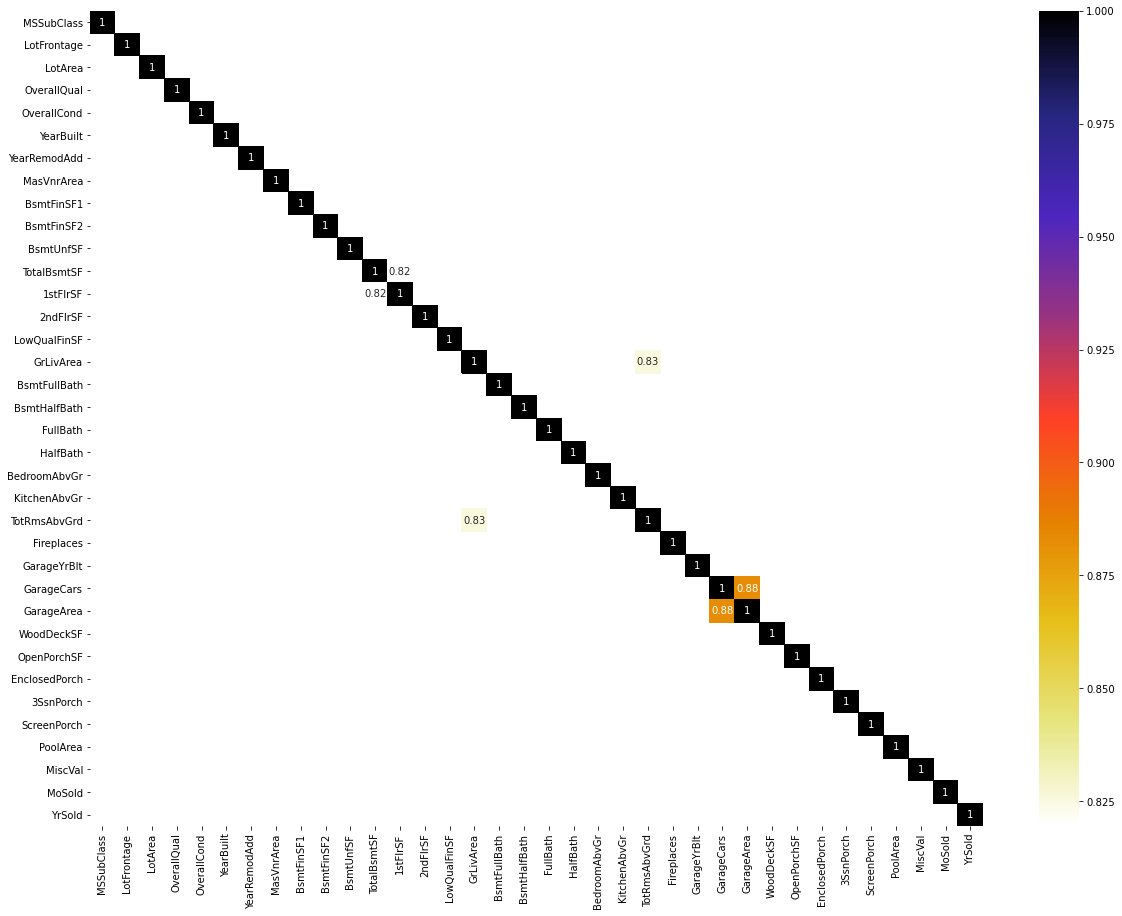

In [22]:
# Check for Multicollinearity 
plt.figure(figsize=(20,15))
cor = df[num_features].corr()
sns.heatmap(cor[cor>0.8], annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

* A lot of features seems to be correlated between each other such as 1stFlrSF/TotalBsmtSF, it is normal that the more the 1st floor is large, the more the total basement will be large.

* While 'GarageCars' and 'GarageArea' also have strong correlation, but they are mostly mutually dependent i.e. they are NOT linearly independent of each other, i.e. there is a high-multicollinearity (0.88 as we can see in the figure) between them. Because, the number of cars that fit into the garage is dependent of the garage area. Hence, we just need one of these variables in our analysis.

To avoid the Multicollinearity problem, we will delete one feature from each pair of highly correlated predictors. So let's make the selection between highly correlated features.

In [23]:
# this function will select the highly correlated features
def high_correlation(data, threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

In [24]:
col_to_drop = list(high_correlation(df[num_features],0.8))
print(col_to_drop)

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']


So we will remove one of the features those are highly correlated between them here we have three fatures returned by the function which are `GarageArea`, `TotRmsAbvGrd` and `1stFlrSF`.

In [25]:
# drop columns in cor_col_drop list
for col in col_to_drop:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

#### Relation between Target / Categorical variables

In [26]:
# list of categorical variables
cat_features = df.select_dtypes('O').columns
print('Number of categoricals variables: ', len(cat_features))
print('\n')
cat_features

Number of categoricals variables:  43




Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

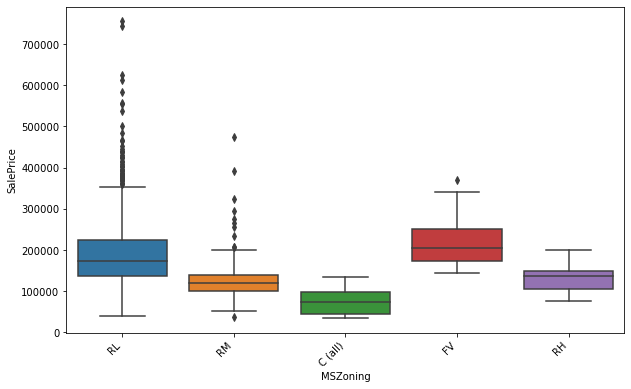

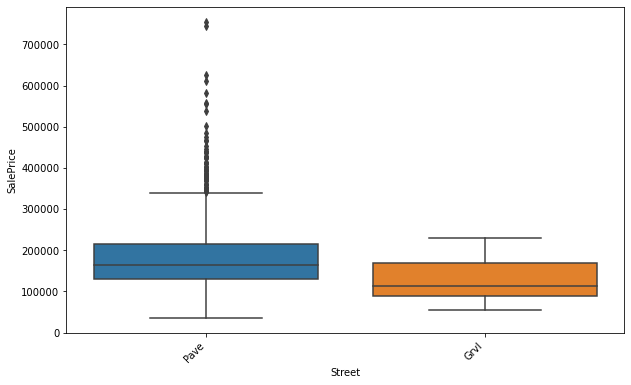

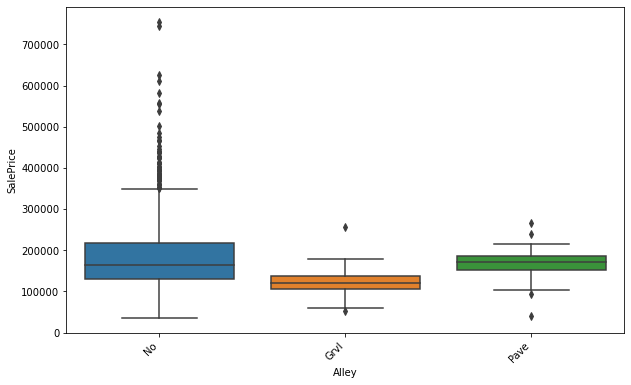

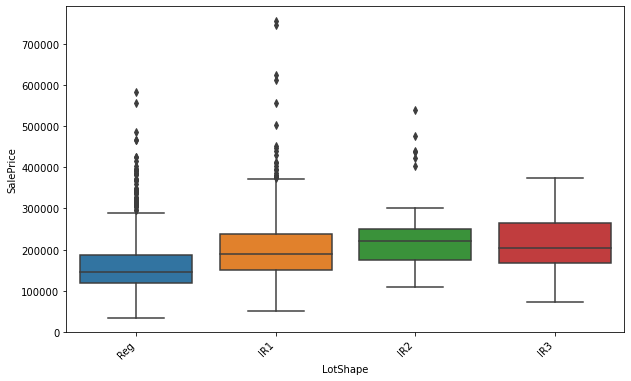

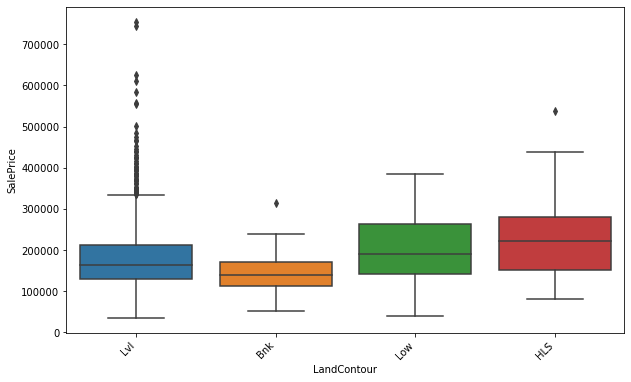

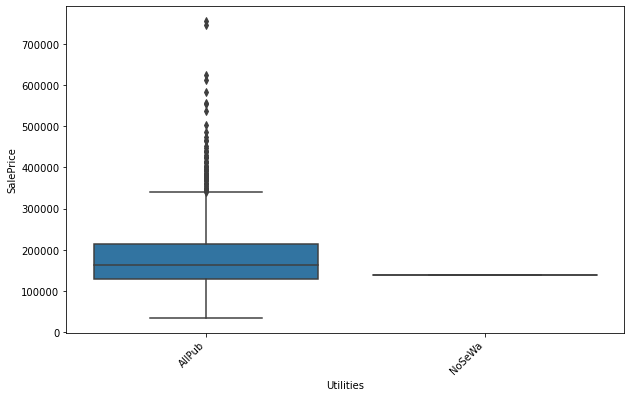

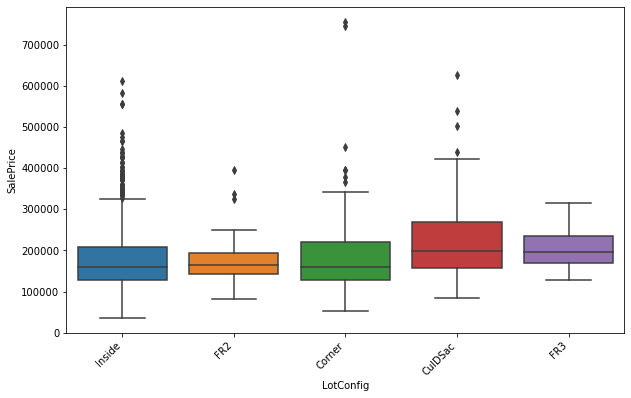

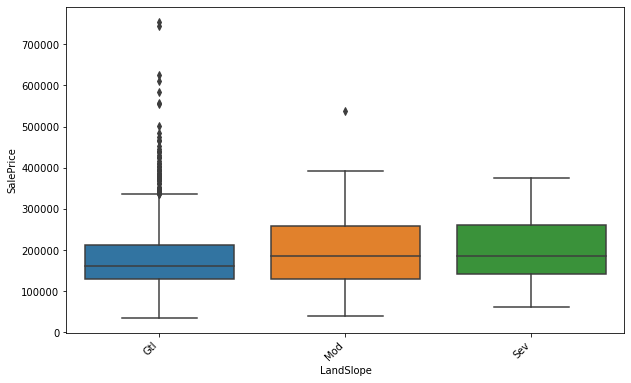

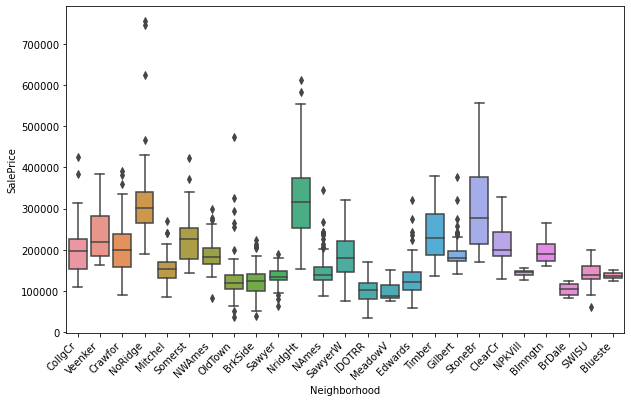

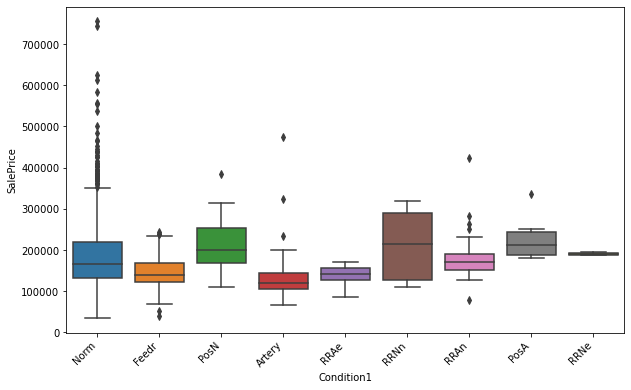

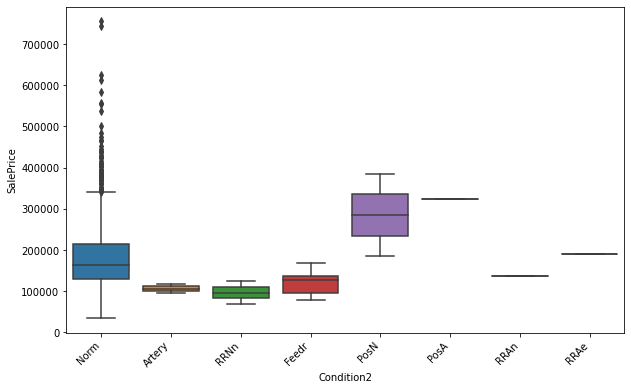

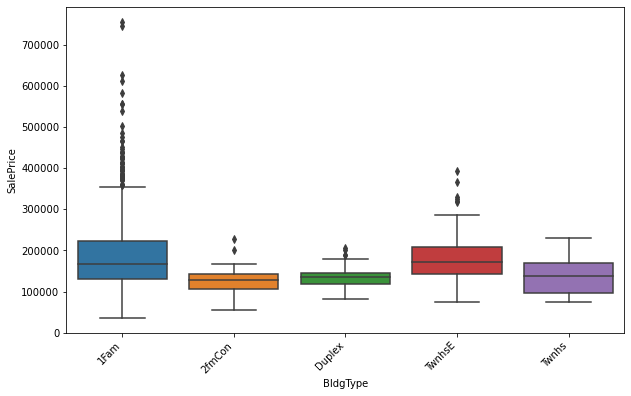

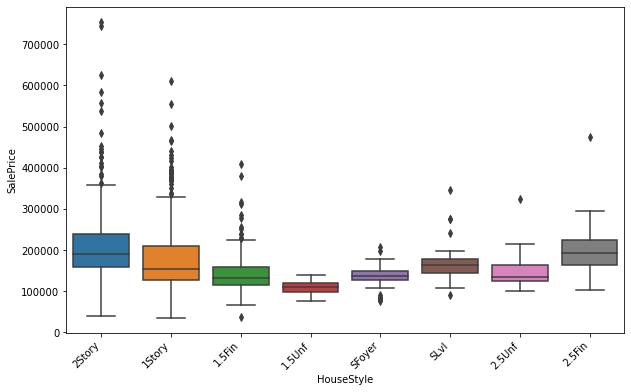

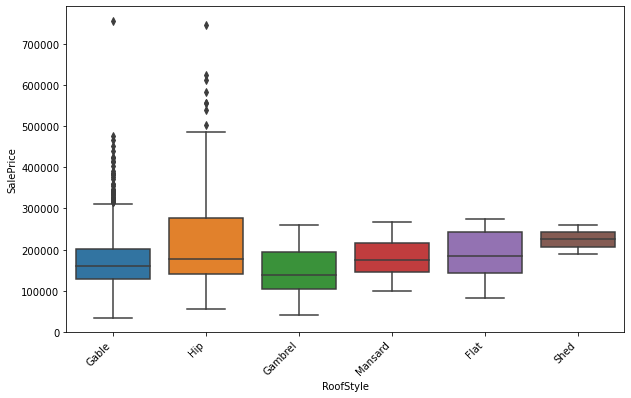

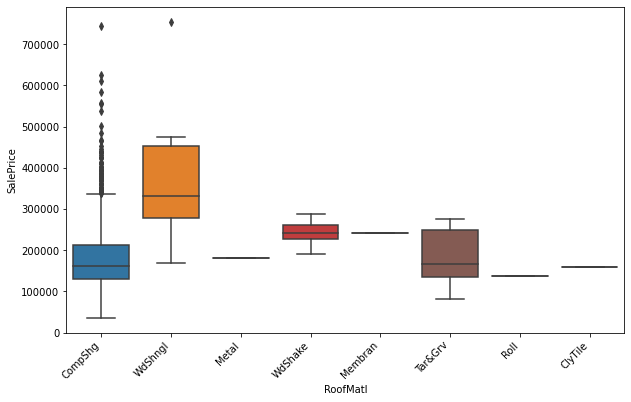

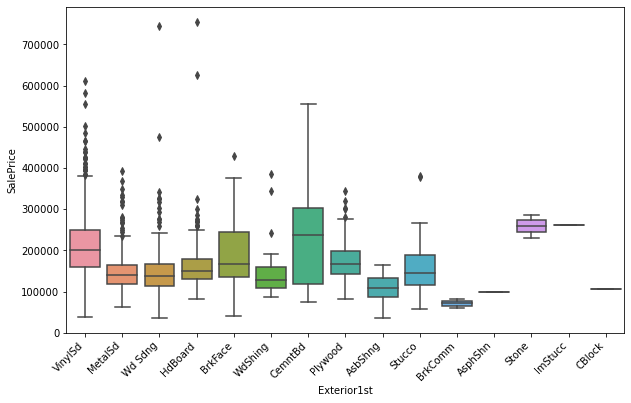

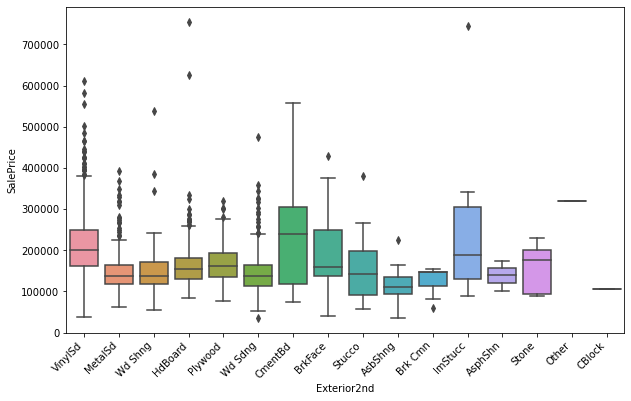

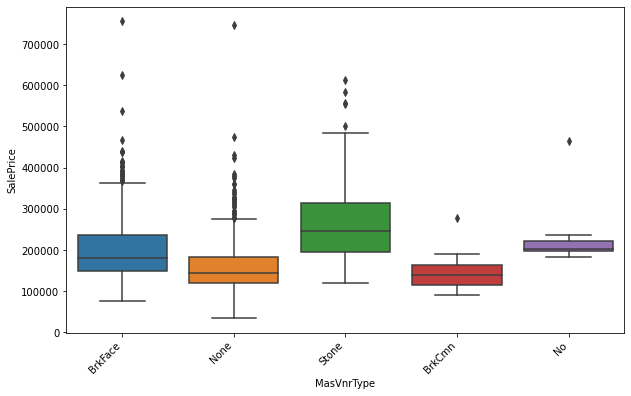

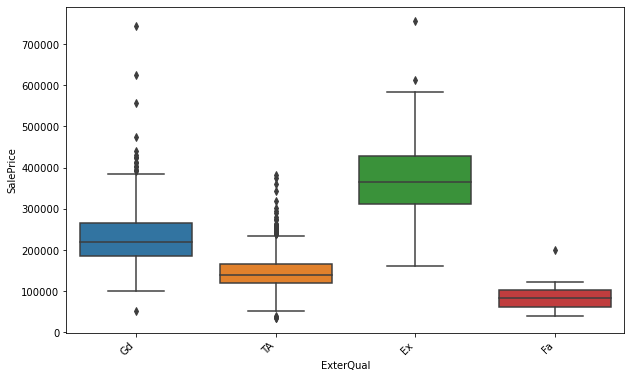

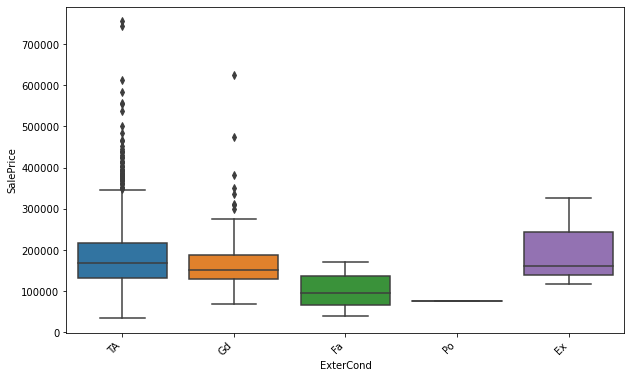

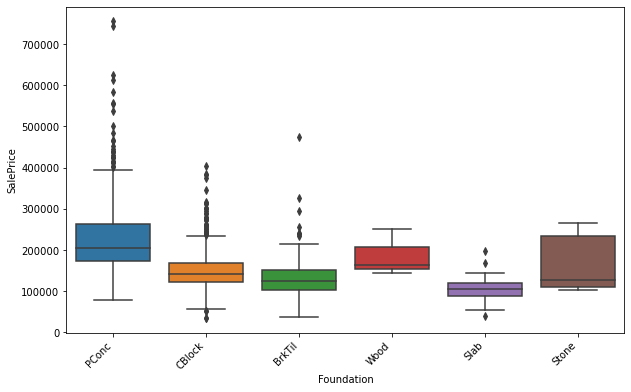

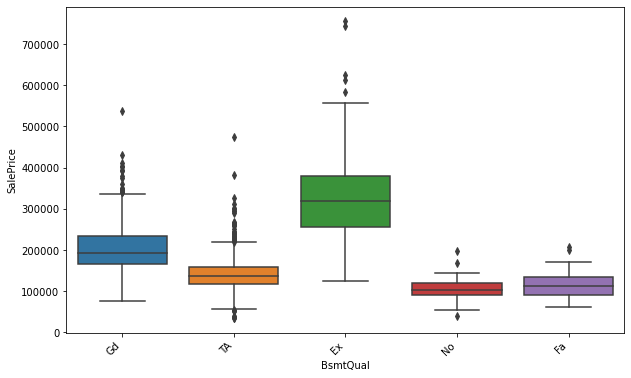

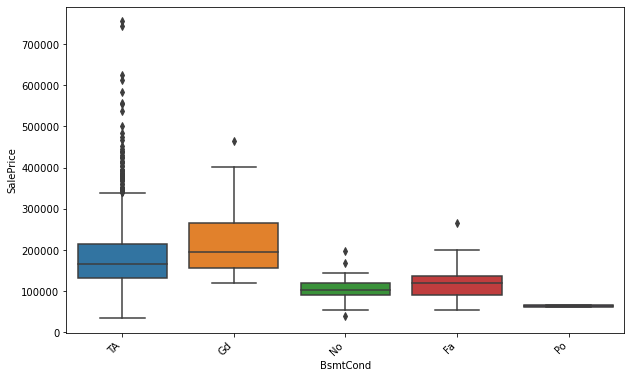

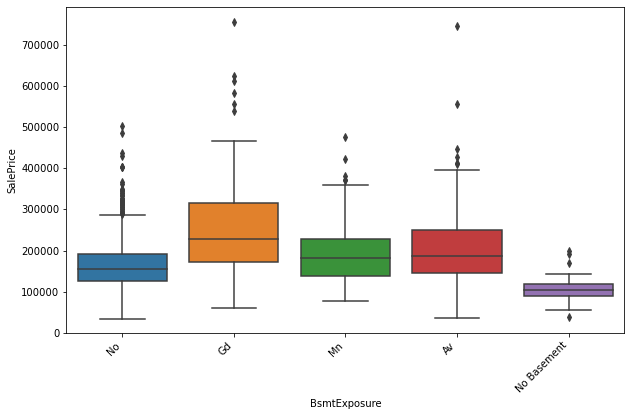

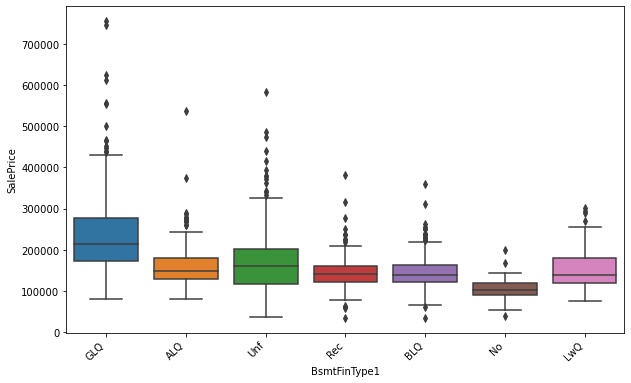

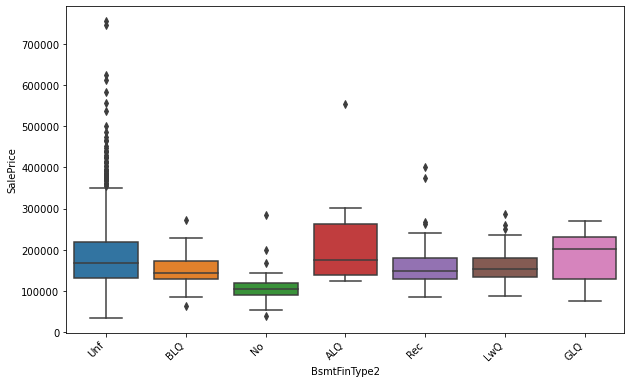

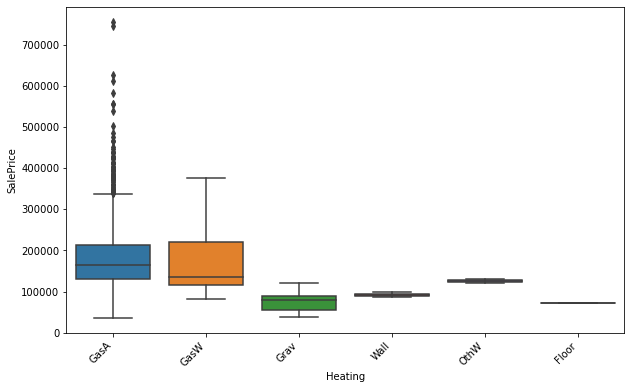

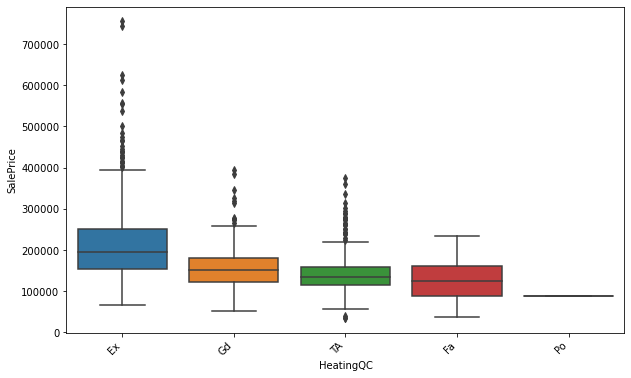

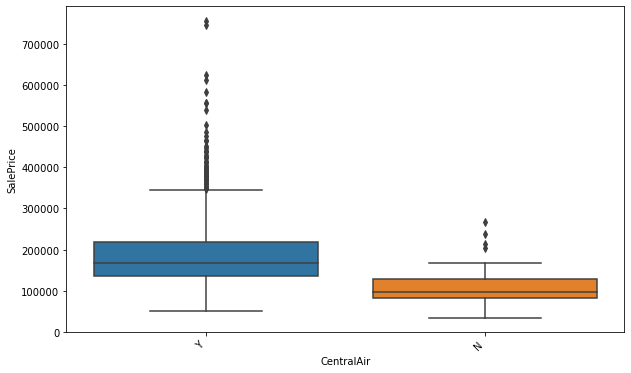

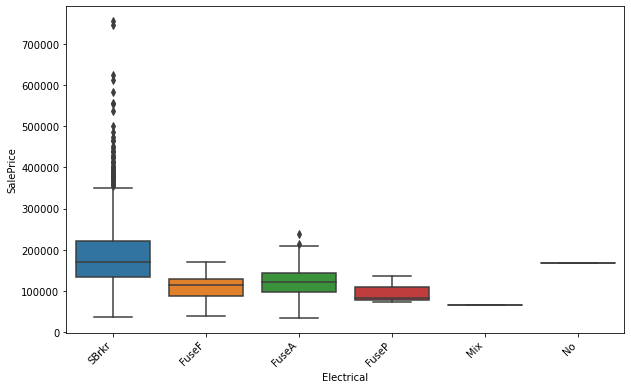

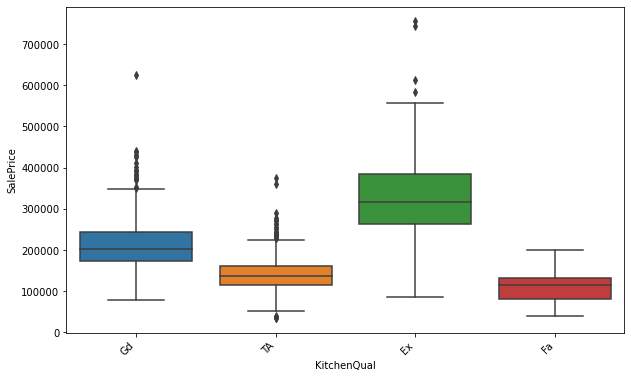

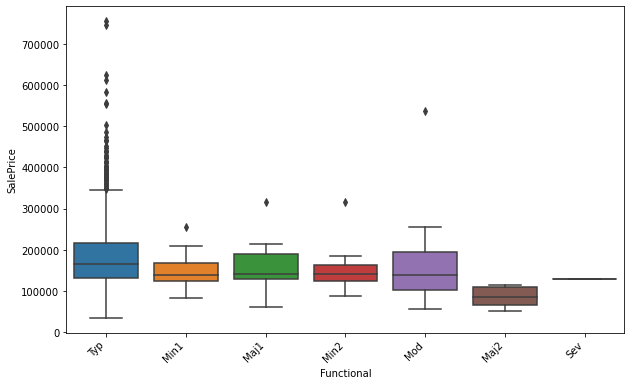

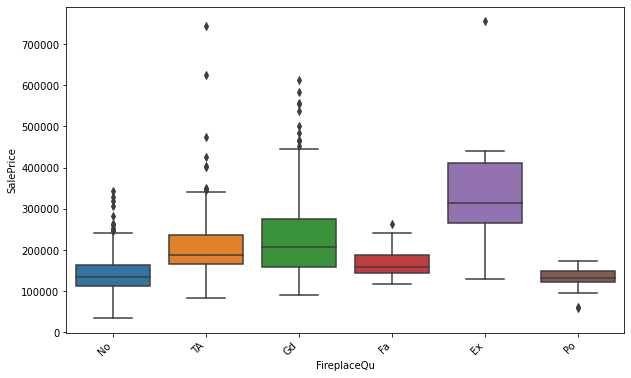

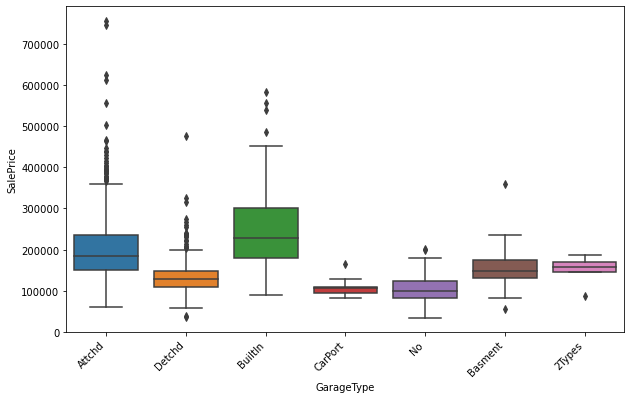

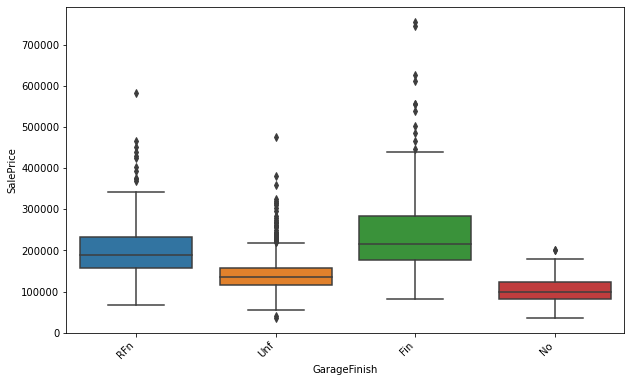

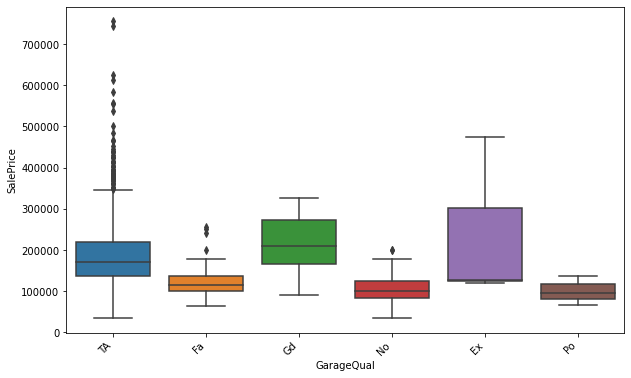

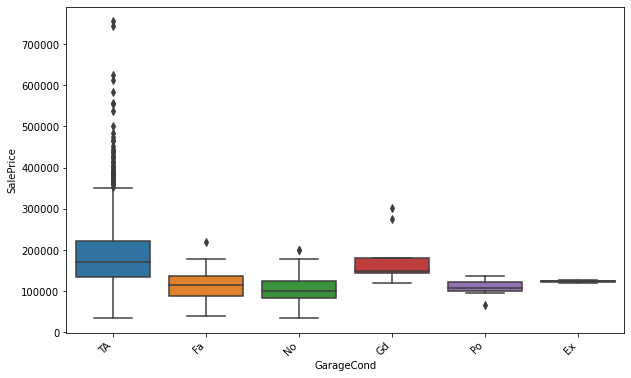

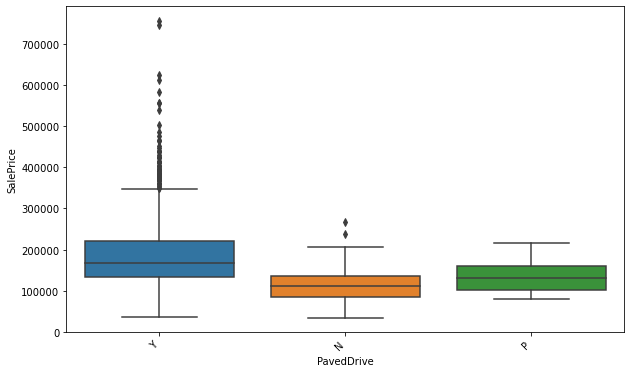

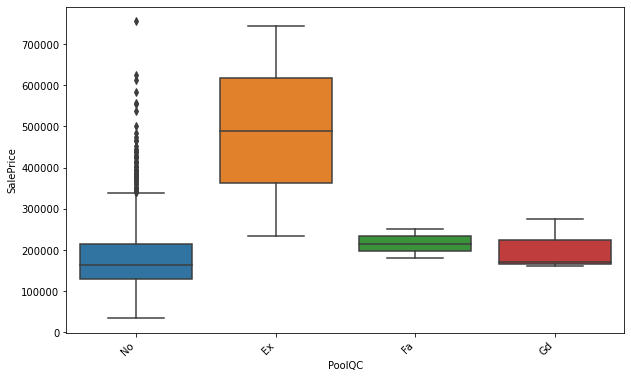

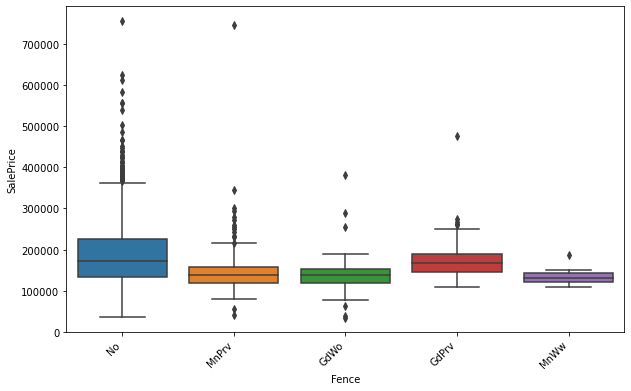

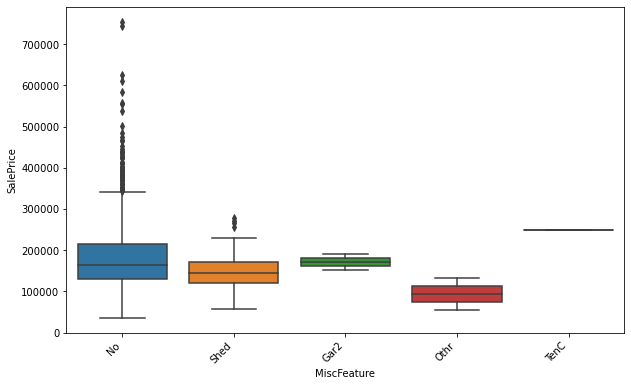

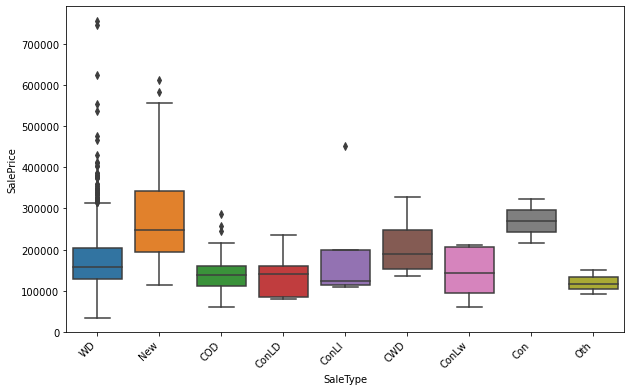

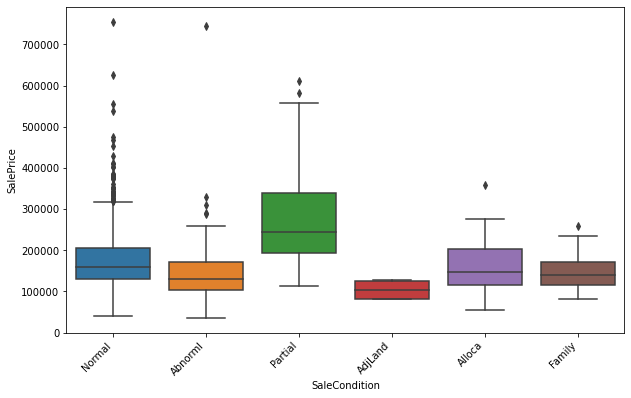

In [27]:
data = pd.concat([df['SalePrice'], df[cat_features]], axis=1)
for f in cat_features:
    plt.figure(figsize=(10,6))
    chart=sns.boxplot(x=f, y="SalePrice", data=data)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

## Model Building Phase 

In this phase our main goal is to build machine learning models able to predict the house price based on house features and to analyze and compare models performance in order to choose the best one.

### 1. TrainTest Split-Encoding

#### Handling Ordinal Variables

There are some ordinal features in our dataset. For example, the `BsmtCond` feature has the following possible values:

In [28]:
print(df['BsmtCond'].unique().tolist())

['TA', 'Gd', 'No', 'Fa', 'Po']


According to the dataset documentation "Gd" means "Good", "TA" means "Typical", "Po" means "Poor", "Fa" means "Fair", and "Ex" means "Excellent".


We will map each one of the possible values of this feature to a number: "No" to 0, "Po" to 1, "Fa" to 2, "TA" to 3, "Gd" to 4, and "Ex" to 5.

Ordinal features in our dataset are: `ExterQual`, `ExterCond`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `HeatingQC`, `KitchenQual`, `Functional`, `FireplaceQu`, `GarageFinish`, `GarageQual`, `GarageCond`, `PoolQC`, `LandSlope` and `Fence`.

In [29]:
mapping1 = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
df['ExterQual'] = df['ExterQual'].map(mapping1)
df['ExterCond'] = df['ExterCond'].map(mapping1)
df['HeatingQC'] = df['HeatingQC'].map(mapping1)
df['KitchenQual'] = df['KitchenQual'].map(mapping1)

mapping2 = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No':0}
df['BsmtQual'] = df['BsmtQual'].map(mapping2)
df['BsmtCond'] = df['BsmtCond'].map(mapping2)
df['FireplaceQu'] = df['FireplaceQu'].map(mapping2)
df['GarageQual'] = df['GarageQual'].map(mapping2)
df['GarageCond'] = df['GarageCond'].map(mapping2)

df['BsmtExposure'] = df['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})

mapping3 = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No':0}
df['BsmtFinType1'] = df['BsmtFinType1'].map(mapping3)
df['BsmtFinType2'] = df['BsmtFinType2'].map(mapping3)

df['Functional'] = df['Functional'].map({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0})
df['GarageFinish'] = df['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'No':0})
df['PoolQC'] = df['PoolQC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'No':0})
df['LandSlope'] = df['LandSlope'].map({'Sev': 2, 'Mod': 1, 'Gtl': 0})
df['Fence'] = df['Fence'].map({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No':0})

In [30]:
# encoding function to dummy categorical variables
def encoding(data):
    data = pd.get_dummies(data, drop_first=True)
    return data

df = encoding(df)
df.head()

,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,PavedDrive_P,PavedDrive_Y,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,0,7,5,2003,2003,196.0,3,2,4,3,1,6,706,1,0,150,856,4,854,0,1710,1,0,2,1,3,1,3,7,0,0,2003.0,2,2,3,3,0,61,0,0,0,0,0,0,0,2,2008,208500,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,0,6,8,1976,1976,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,0,0,1262,0,1,2,0,3,1,2,7,1,3,1976.0,2,2,3,3,298,0,0,0,0,0,0,0,0,5,2007,181500,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [31]:
# split our dataset into train and test data
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)
display(trainset.shape)
display(testset.shape)

(1168, 205)

(292, 205)

In [32]:
# here we're gonna use the median replacement technique to handle missing numerical values.
def median_imputation(df,variable):
    df[variable]=df[variable].fillna(df[variable].median())

median_imputation(trainset,'LotFrontage')
median_imputation(trainset,'MasVnrArea') 

median_imputation(testset,'LotFrontage')
median_imputation(testset,'MasVnrArea') 

In order to make all algorithms work properly with our data, we need to scale the features down in our dataset. 
For that, we will use a helpful function named StandardScaler().

In [33]:
# feature scaling
from sklearn.preprocessing import StandardScaler
def data_scaling(data):
    scaler = StandardScaler()
    data.loc[:,'MSSubClass':'YrSold'] = scaler.fit_transform(data.loc[:,'MSSubClass':'YrSold'])

data_scaling(trainset)
data_scaling(testset)

In [34]:
trainset.head()

,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,PavedDrive_P,PavedDrive_Y,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
618,-0.868365,0.987831,0.103212,-0.235387,2.131506,-0.513041,1.188032,1.078914,1.914933,2.826667,-0.223988,1.754134,0.109827,1.296486,1.175992,-0.901062,-0.281229,-0.291823,2.757198,1.865729,0.893034,-0.802555,-0.125918,0.601886,-0.820747,-0.236888,0.792769,-0.773624,0.146285,-0.203898,0.752607,0.240174,0.605438,1.212558,0.295276,-0.819963,1.683633,0.255704,0.258819,-0.742575,0.874116,-0.364703,-0.115333,4.546911,-0.058085,-0.054485,-0.455973,-0.092588,0.256396,-0.613562,314813,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [35]:
# X_train, y_train
X_train = trainset.drop('SalePrice', axis=1)
y_train = trainset['SalePrice']

# X_test, y_test
X_test = testset.drop('SalePrice', axis=1)
y_test = testset['SalePrice']

### 2. Modeling and evaluation

* **We will follow the below steps to build a model:**
    - Implement many modeling techniques
    - Train (fit) the models on the training dataset
    - Test and evaluate the models
    - Search for an effective parameter combination for the chosen algorithms
    - Choose the technique that yield the best results

In [36]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

In [37]:
def evaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2Score = r2_score(y_test, y_pred)

    print("R2 score   : ", r2Score)
    print("MSE        : ", mean_squared_error(y_test, y_pred))
    print("MAE        : ", mean_absolute_error(y_test, y_pred))
    print("MedianAE   : ", median_absolute_error(y_test, y_pred))
    
    err_test = np.abs(y_test-y_pred)
    plt.hist(err_test, bins=50)
    plt.title('Errors distribution')
    plt.xlabel('SalePrice')
    plt.show()

We are going to search for effective parameters for each model using `GridSearchCV` and `RandomizedSearchCV`.

In [38]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

best score:   0.7292708529419343
best params:   {'max_depth': 15, 'max_features': 45, 'min_samples_split': 5}


R2 score   :  0.7155053590976146
MSE        :  1964677305.634945
MAE        :  29021.368769025878
MedianAE   :  20020.0


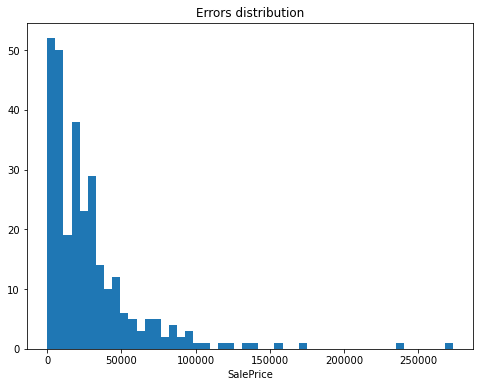

In [39]:
# Decision Tree with GridSearcheCV

# dictionary of parameters
DT_params_dic1 = {
    "max_depth": [7, 15],
    "min_samples_split": [5, 10],
    "max_features": [30, 45]
}

DT1 = DecisionTreeRegressor()
DT_grid1 = GridSearchCV(DT1, DT_params_dic1, cv=5, scoring="r2")
DT_grid1.fit(X_train, y_train)

print("best score:  ",DT_grid1.best_score_)
print("best params:  ",DT_grid1.best_params_)
print('\n')
DT_model1 = DT_grid1.best_estimator_
evaluation(DT_model1, X_test, y_test)

The code above will test the decision-tree model using all the parameter combinations. It will use cross validation with 5 folds and it will use the r2 score for scoring and comparing different parameter combinations. At the end, it will provide us with the best parameter combination that achieved the best score so we can use it to build our model.

Sometimes, when the number of parameter combinations is large, `GridSearchCV()` can take very long time to run. So in addition to `GridSearchCV()`, we will sometimes use `RandomizedSearchCV()` which is similar to `GridSearchCV()` but instead of using all parameter combinations, it picks a number of random combinations specified by `n_iter`. For the example above, we can use `RandomizedSearchCV()` as follows:

In [40]:
def model_fitting(model, params_dict, X_tr, y_tr, X_ts, y_ts):
    model_random = RandomizedSearchCV(model, params_dict, n_iter=40, cv=5)
    model_random.fit(X_tr, y_tr)

    print("best score:  ",model_random.best_score_)
    print("best params:  ",model_random.best_params_)
    print('\n')
    
    evaluation(model_random.best_estimator_, X_ts, y_ts)
    return model_random.best_estimator_

best score:   0.7791055467067591
best params:   {'random_state': 60, 'min_samples_split': 20, 'min_samples_leaf': 7, 'max_features': 150, 'max_depth': 20, 'criterion': 'mae'}


R2 score   :  0.722153671581682
MSE        :  1918765057.1061645
MAE        :  25937.345890410958
MedianAE   :  16625.0


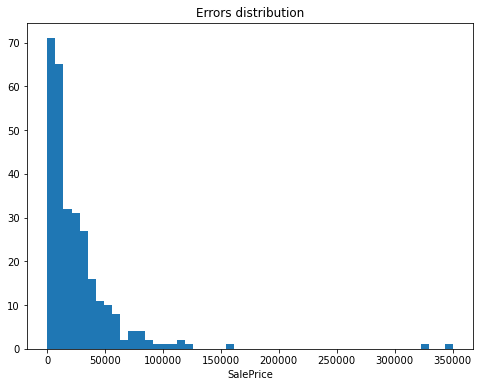

In [41]:
# Decision Tree with RandomizedSearchCV

# dictionary of parameters
DT_params_dic2 = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [5, 15, 20, 40, 60],
    'min_samples_leaf': [3, 7, 15, 25],
    'max_features': [20, 50, 100, 150, X_train.shape[1]],
    'random_state': [0, 2, 8, 20, 30, 60, 80, 100]
}

DT2 = DecisionTreeRegressor()
tree_model = model_fitting(DT2, DT_params_dic2, X_train, y_train, X_test, y_test)

best score:   0.875406376121062
best params:   {'random_state': 80, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 100, 'max_depth': 20, 'criterion': 'mae'}


R2 score   :  0.853699602776668
MSE        :  1010328592.8984542
MAE        :  16969.669160958903
MedianAE   :  9594.580000000002


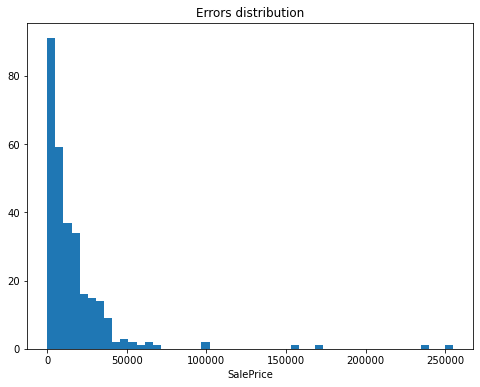

In [42]:
# Random Forest

# dictionary of parameters
RFR_params_dic = {'n_estimators': [10, 100, 200, 300],
                  'criterion': ['mse','mae'],
                  'max_depth': [10, 15, 20, 30],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 5],
                  'max_features': [50, 100, 150, X_train.shape[1]],
                  'random_state': [0, 2, 8, 20, 30, 60, 80, 100]
                  }

RandomFR = RandomForestRegressor()
RandomFR_model = model_fitting(RandomFR, RFR_params_dic, X_train, y_train, X_test, y_test)

best score:   0.7829495659520347
best params:   {'weights': 'distance', 'n_neighbors': 10, 'leaf_size': 10, 'algorithm': 'kd_tree'}


R2 score   :  0.6738044114524899
MSE        :  2252657793.4289446
MAE        :  25136.690304319283
MedianAE   :  14608.056835303032


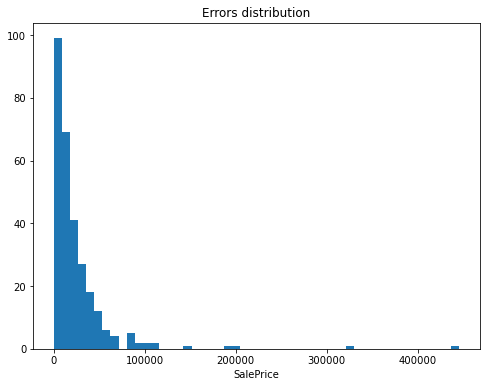

In [43]:
# KNN

# dictionary of parameters
KNN_params_dic = {'n_neighbors' : [5,10,15],
                  'weights' : ['uniform', 'distance'],
                  'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'leaf_size' : [5,10,20,30]
                 }

KNN = KNeighborsRegressor()
KNN_model = model_fitting(KNN, KNN_params_dic, X_train, y_train, X_test, y_test)

best score:   0.8568830754124963
best params:   {'kernel': 'poly', 'gamma': 'scale', 'degree': 6, 'coef0': 3, 'C': 10}


R2 score   :  0.7602019985689622
MSE        :  1656009019.5506592
MAE        :  16641.779425238743
MedianAE   :  8845.778643348705


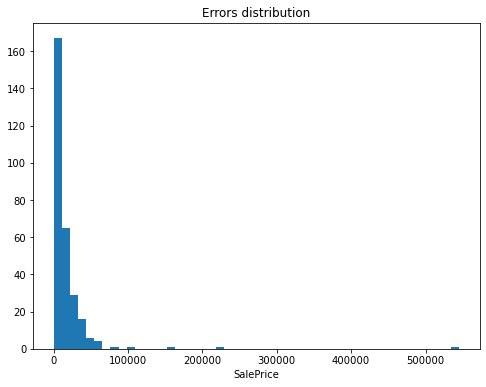

In [44]:
# Support Verctor Regressor

# dictionary of parameters
SVR_params_dic =   {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                   'degree' : [2,6,10,14],
                   'coef0': [0, 1, 3, 7],
                   'gamma': ['scale', 'auto'], 
                   'C': [1, 10, 100]
                   }

SVR_regressor = SVR()
SVR_regressor_model = model_fitting(SVR_regressor, SVR_params_dic, X_train, y_train, X_test, y_test)

best score:   0.8043667239993779
best params:   {'random_state': 30, 'n_estimators': 90, 'loss': 'exponential', 'learning_rate': 2}


R2 score   :  0.7507993821109039
MSE        :  1720942078.0790803
MAE        :  27658.50815791831
MedianAE   :  18852.35745367517


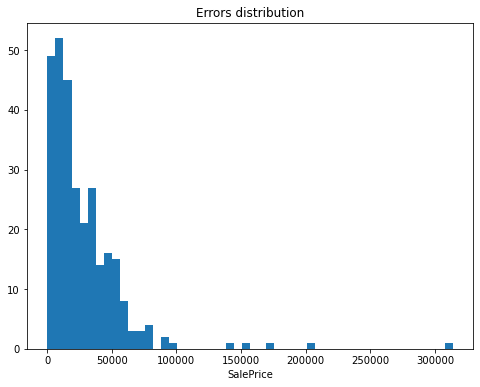

In [47]:
# AdaBoost

# dictionary of parameters
AdaBoost_params_dic = {'n_estimators' : [10, 30, 50, 70, 90, 120], # np.arange(10,70),
                  'learning_rate' : [0.5,0.75,1,1.5,2],
                  'loss': ['linear', 'square', 'exponential'],
                  'random_state': [0, 2, 8, 20, 30, 60, 80, 100]    
                      }

AdaBoost = AdaBoostRegressor()
AdaBoost_model = model_fitting(AdaBoost, AdaBoost_params_dic, X_train, y_train, X_test, y_test)

best score:   0.8886603475468823
best params:   {'subsample': 0.3, 'reg_lambda': 3, 'reg_alpha': 1, 'n_estimators': 2500, 'max_depth': 4, 'learning_rate': 0.005, 'gamma': 100, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5, 'booster': 'gbtree'}


R2 score   :  0.8687603032962021
MSE        :  906321654.7577617
MAE        :  16108.828526327055
MedianAE   :  9488.71875


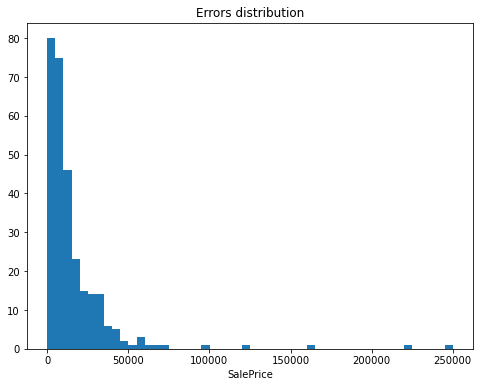

In [48]:
# XgBoost

# dictionary of parameters
XgB_params_dic = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

XgB = XGBRegressor(random_state=3, silent = True)
XgB_model = model_fitting(XgB, XgB_params_dic, X_train, y_train, X_test, y_test)

#### Models comparison

In [49]:
x = ['Decision Tree','Random Forest', 'KNN', 'SVR', 'AdaBoost', 'XGBoost']
y = [0.722153671581682, 0.853699602776668, 0.6738044114524899, 0.7602019985689622, 0.7507993821109039, 0.8687603032962021]
models_df = pd.DataFrame(y, index=x, columns = ['Score']).sort_values(by='Score', ascending=False)
models_df

,Score
XGBoost,0.868760
Random Forest,0.853700
SVR,0.760202
AdaBoost,0.750799
Decision Tree,0.722154
KNN,0.673804


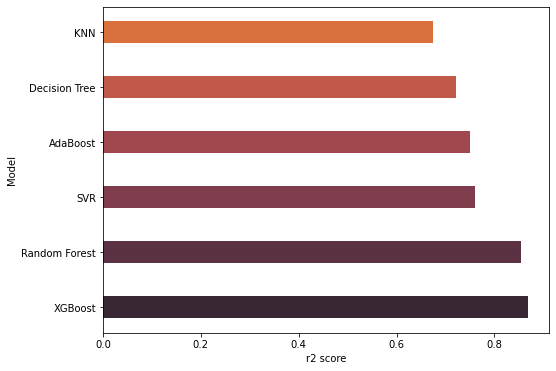

In [50]:
colors = ["#392834", "#5a3244", "#7e3c4d", "#a1484f", "#c05949", "#d86f3d"]
fig, ax = plt.subplots()
plt.barh(y=range(len(models_df.index)), tick_label=models_df.index, width=models_df.Score, height=0.4, color=colors);
ax.set(xlabel="r2 score", ylabel="Model");

We can see from the table and the bar plot that XgBoost model has the biggest r2 score `0.868760` followed by Random Forest with `0.853700`. Then Support Vector Regressor comes with `0.760202`, AdaBoost with `0.750799` and Decision Tree with `0.722154`. Finally comes K Nearest Neighbors with `0.673804`.

So here we can say that the best model is XgBoost and the worst one is K Nearest Neighbors.

#### Feature importance 

There are some of the models provide the ability to see the importance of each feature in the dataset after fitting the model such as XgBoost and Random Forest, so let's look at feature importances provided by both models.

* XGBoost

Here we're going to look at the 30 most important feature:

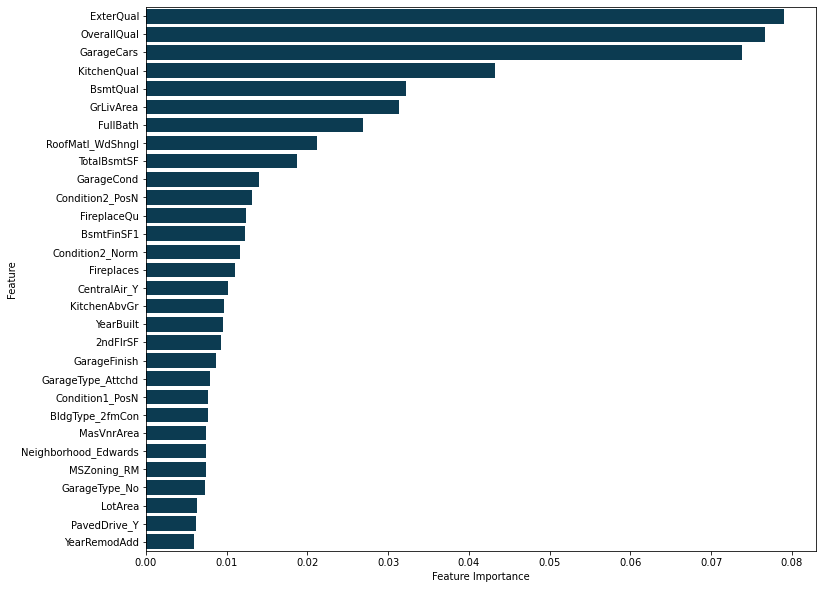

In [51]:
xgb_feature_importances = XgB_model.feature_importances_
xgb_feature_importances = pd.Series(
    xgb_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False).head(30)

fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x=xgb_feature_importances, 
            y=xgb_feature_importances.index, 
            color="#003f5c");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

Here we are going to retrain our XgBoost model by selecting only the 15 most important features to figure out if we will get better result. 

In [64]:
xgb_features_selected = xgb_feature_importances.head(15)
xgb_df = df.copy()
xgb_best_features=list(xgb_features_selected.index)
xgb_best_features.append('SalePrice')
xgb_df = encoding(xgb_df[xgb_best_features])

# split our dataset into train and test data
xgb_trainset, xgb_testset = train_test_split(xgb_df, test_size=0.2, random_state=0)
display(xgb_trainset.shape)
display(xgb_testset.shape)

(1168, 16)

(292, 16)

In [65]:
xgb_trainset.head()

,ExterQual,OverallQual,GarageCars,KitchenQual,BsmtQual,GrLivArea,FullBath,RoofMatl_WdShngl,TotalBsmtSF,GarageCond,Condition2_PosN,FireplaceQu,BsmtFinSF1,Condition2_Norm,Fireplaces,SalePrice
618,4,9,3,3,5,1828,2,0,1822,3,0,4,48,1,1,314813
870,2,5,1,2,3,894,1,0,894,3,0,0,0,1,0,109500
92,2,5,2,2,4,964,1,0,876,3,0,0,713,1,0,163500
817,3,8,3,3,4,1689,2,0,1568,3,0,4,1218,1,2,271000
302,3,7,3,3,4,1541,2,0,1541,3,0,3,0,1,1,205000


In [66]:
scaler = StandardScaler()
xgb_trainset.loc[:,'ExterQual':'Fireplaces'] = scaler.fit_transform(xgb_trainset.loc[:,'ExterQual':'Fireplaces'])
xgb_testset.loc[:,'ExterQual':'Fireplaces'] = scaler.fit_transform(xgb_testset.loc[:,'ExterQual':'Fireplaces'])

In [67]:
# X_train, y_train
xgb_X_train = xgb_trainset.drop('SalePrice', axis=1)
xgb_y_train = xgb_trainset['SalePrice']

# X_test, y_test
xgb_X_test = xgb_testset.drop('SalePrice', axis=1)
xgb_y_test = xgb_testset['SalePrice']

best score:   0.8632013216434158
best params:   {'subsample': 0.3, 'reg_lambda': 10, 'reg_alpha': 10, 'n_estimators': 2500, 'max_depth': 4, 'learning_rate': 0.005, 'gamma': 7, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7, 'booster': 'gbtree'}


R2 score   :  0.8460958067167326
MSE        :  1062839267.6452501
MAE        :  18974.989913313355
MedianAE   :  12399.4296875


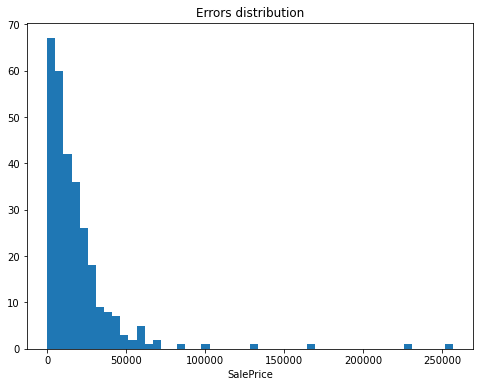

In [68]:
# XgBoost
from xgboost import XGBRegressor

# dictionary of parameters
XgB_params_dic = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

XgB2 = XGBRegressor(random_state=3, silent = True)
XgB_model2 = model_fitting(XgB2, XgB_params_dic, xgb_X_train, xgb_y_train, xgb_X_test, xgb_y_test)

* Random Forest

Same thing will be done for  Random Forest model, only the 15 most important features will be selected to see if we would get better result. 

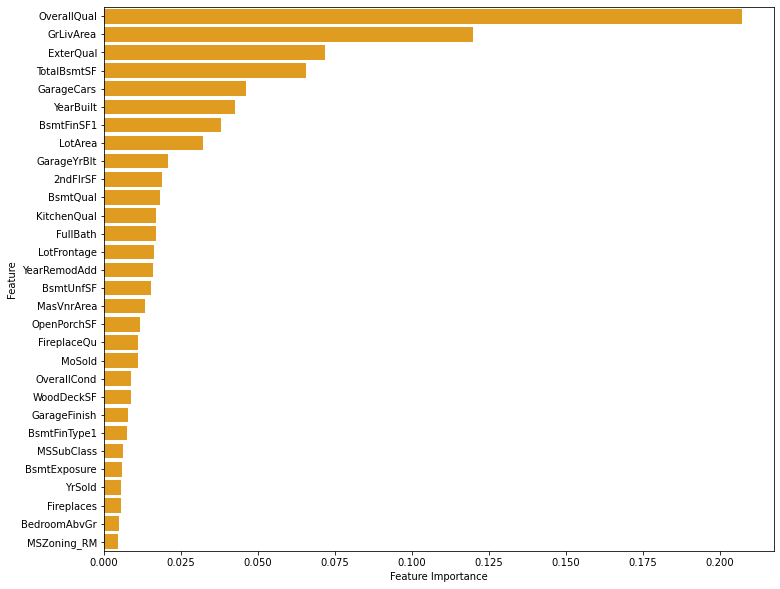

In [69]:
rf_feature_importances = RandomFR_model.feature_importances_
rf_feature_importances = pd.Series(
    rf_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False).head(30)

fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x=rf_feature_importances, 
            y=rf_feature_importances.index, 
            color="#ffa600");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

In [70]:
RF_features_selected = rf_feature_importances.head(15)
RF_features_selected

OverallQual     0.207061
GrLivArea       0.119878
ExterQual       0.071934
TotalBsmtSF     0.065632
GarageCars      0.046120
YearBuilt       0.042590
BsmtFinSF1      0.038067
LotArea         0.032088
GarageYrBlt     0.020939
2ndFlrSF        0.018835
BsmtQual        0.018223
KitchenQual     0.017019
FullBath        0.016914
LotFrontage     0.016340
YearRemodAdd    0.015982
dtype: float64

In [71]:
RF_df = df.copy()
RF_best_features=list(RF_features_selected.index)
RF_best_features.append('SalePrice')
RF_df = encoding(RF_df[RF_best_features])
RF_df.head()

,OverallQual,GrLivArea,ExterQual,TotalBsmtSF,GarageCars,YearBuilt,BsmtFinSF1,LotArea,GarageYrBlt,2ndFlrSF,BsmtQual,KitchenQual,FullBath,LotFrontage,YearRemodAdd,SalePrice
0,7,1710,3,856,2,2003,706,8450,2003.0,854,4,3,2,65.0,2003,208500
1,6,1262,2,1262,2,1976,978,9600,1976.0,0,4,2,2,80.0,1976,181500
2,7,1786,3,920,2,2001,486,11250,2001.0,866,4,3,2,68.0,2002,223500
3,7,1717,2,756,3,1915,216,9550,1998.0,756,3,3,1,60.0,1970,140000
4,8,2198,3,1145,3,2000,655,14260,2000.0,1053,4,3,2,84.0,2000,250000


In [74]:
# split our dataset into train and test data
RF_trainset, RF_testset = train_test_split(RF_df, test_size=0.2, random_state=0)
display(RF_trainset.shape)
display(RF_testset.shape)

(1168, 16)

(292, 16)

In [75]:
median_imputation(RF_trainset,'LotFrontage') 

median_imputation(RF_testset,'LotFrontage') 

In [76]:
scaler = StandardScaler()
RF_trainset.loc[:,'OverallQual':'YearRemodAdd'] = scaler.fit_transform(RF_trainset.loc[:,'OverallQual':'YearRemodAdd'])
RF_testset.loc[:,'OverallQual':'YearRemodAdd'] = scaler.fit_transform(RF_testset.loc[:,'OverallQual':'YearRemodAdd'])

In [77]:
# X_train, y_train
RF_X_train = RF_trainset.drop('SalePrice', axis=1)
RF_y_train = RF_trainset['SalePrice']

# X_test, y_test
RF_X_test = RF_testset.drop('SalePrice', axis=1)
RF_y_test = RF_testset['SalePrice']

best score:   0.8583114973094634
best params:   {'random_state': 30, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 15, 'max_depth': 20, 'criterion': 'mae'}


R2 score   :  0.8563932552351058
MSE        :  991726633.1653142
MAE        :  18260.410753424654
MedianAE   :  11874.94666666667


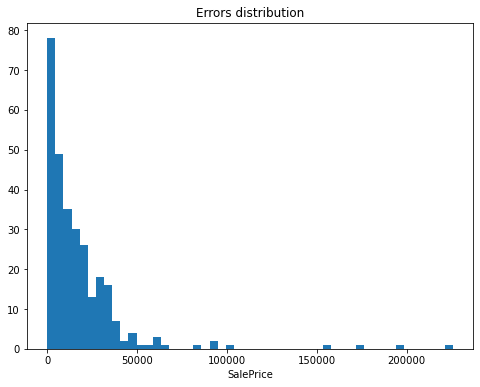

In [83]:
# Random Forest

# dictionary of parameters
RFR_params_dic = {'n_estimators': [10, 100, 200, 300],
                  'criterion': ['mse','mae'],
                  'max_depth': [10, 15, 20, 30],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 5],
                  'max_features': [50, 100, 150, RF_X_train.shape[1]],
                  'random_state': [0, 2, 8, 20, 30, 60, 80, 100]
                  }

RandomFR2 = RandomForestRegressor()
RandomFR_model2 = model_fitting(RandomFR2, RFR_params_dic, RF_X_train, RF_y_train, RF_X_test, RF_y_test)